In [1]:
# import package
import pandas as pd 
import random
import numpy as np 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from seaborn import regplot
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
from scipy.stats import gamma,expon,norm,chi2

In [2]:
# loading data
Batting     = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Batting.csv');
People      = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\People.csv');
Salaries    = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Salaries.csv');
Fielding    = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Fielding.csv');
Appearances = pd.read_csv(r'C:\Users\ASUS\Desktop\baseballdatabank-master\baseballdatabank-master\core\Appearances.csv');

In [33]:
Salaries.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
yearID,26428.0,NaN,NaN,NaN,2000.878727,8.909314,1985.0,1994.0,2001.0,2009.0,2016.0
teamID,26428,35,LAN,957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lgID,26428,2,NL,13469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
playerID,26428,5149,moyerja01,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,26428.0,NaN,NaN,NaN,2085634.053125,3455348.161223,0.0,294702.0,550000.0,2350000.0,33000000.0


In [3]:
salary = Salaries[Salaries['salary']>0].reset_index().drop('index',axis=1)

In [4]:
m_s = salary.copy()
m_s['yearID'] = m_s['yearID']-1
m_s = m_s.drop_duplicates(subset=['playerID','yearID'])

In [5]:
mm = MinMaxScaler()
target = pd.DataFrame()
for i in range(1984,2016):
    t = m_s[m_s['yearID']==i].reset_index().drop('index',axis=1)
    x = np.log(t[['salary']])#mm.fit_transform()
    t.insert(5,'salary_adjust',x)
    target = pd.concat([target,t])

<AxesSubplot:xlabel='yearID', ylabel='salary_adjust'>

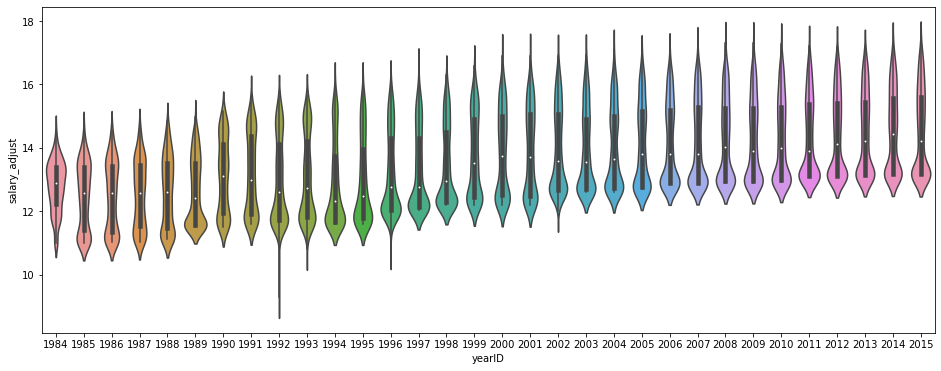

In [6]:
plt.figure(figsize=(16,6))
sns.violinplot(x = target['yearID'],y = (target['salary_adjust']))

In [7]:
target.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
yearID,26321.0,NaN,NaN,NaN,1999.902169,8.914136,1984.0,1993.0,2000.0,2008.0,2015.0
teamID,26321,35,LAN,954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lgID,26321,2,NL,13418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
playerID,26321,5149,moyerja01,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,26321.0,NaN,NaN,NaN,2091834.241252,3460599.139759,10900.0,300000.0,550000.0,2350000.0,33000000.0
salary_adjust,26321.0,NaN,NaN,NaN,13.570838,1.392364,9.296518,12.611538,13.217674,14.669926,17.312018


## 薪資以小提琴圖觀察

In [8]:
target[target['yearID']==2010].describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,839.0,2.010000e+03,0.000000e+00,2010.000000,2010.000000,2.010000e+03,2.010000e+03,2.010000e+03
salary,839.0,3.318838e+06,4.541140e+06,414000.000000,431200.000000,1.200000e+06,4.343750e+06,3.200000e+07
salary_adjust,839.0,1.422755e+01,1.241330e+00,12.933621,12.974327,1.399783e+01,1.528422e+01,1.728125e+01


<AxesSubplot:ylabel='salary_adjust'>

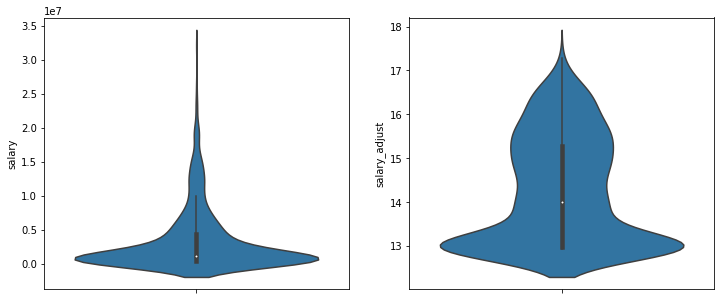

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.violinplot(y = target[target['yearID']==2010]['salary'])
plt.subplot(1,2,2)
sns.violinplot(y = target[target['yearID']==2010]['salary_adjust'])

<AxesSubplot:xlabel='yearID', ylabel='salary_adjust'>

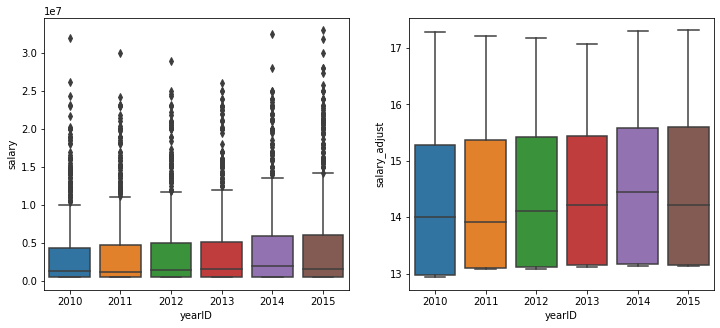

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=target[target['yearID']>=2010]['yearID'],y=target[target['yearID']>=2010]['salary'])
plt.subplot(1,2,2)
sns.boxplot(x=target[target['yearID']>=2010]['yearID'],y=target[target['yearID']>=2010]['salary_adjust'])

## 確定薪資結構的分布是否為高斯分布
透過Jarque-Bera檢驗，其統計量可以用於檢定數據是否服從常態分布。原假設H0是偏度為0，峰度為3（因為常態分布的偏度為0，峰度為3）。

skew:0.073,kurt:0.015,Jarque_beraResult(statistic=0.9032657313769091, pvalue=0.6365878400666634)


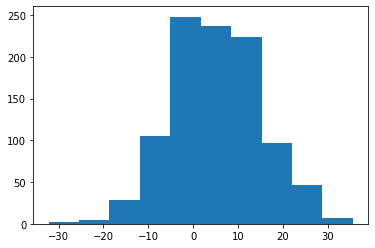

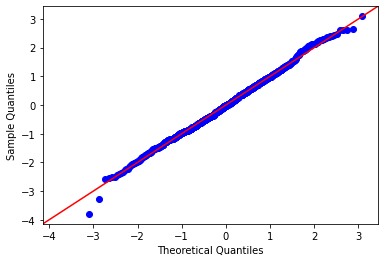

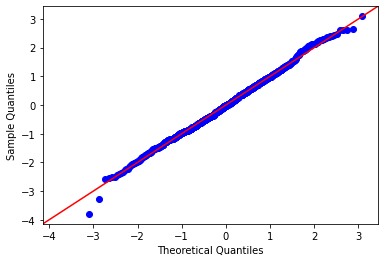

In [2]:
nums = []
for i in range(1000):
    x = random.gauss(mu=0, sigma=1)
    nums.append((x*10)+5)

# 繪製直方圖
print('skew:{:.3f},kurt:{:.3f},{}'.format(stats.skew(nums),stats.kurtosis(nums),stats.jarque_bera(nums)))
plt.hist((nums), bins=10)
plt.show()
sm.qqplot(np.array(nums), dist="norm", fit=True, line='45')

<AxesSubplot:>

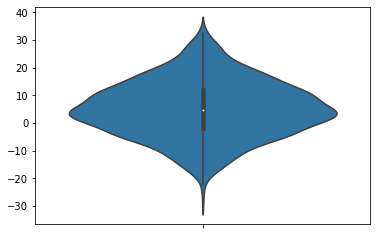

In [12]:
# 常態分佈
sns.violinplot(y = nums)

skew:3.096,kurt:11.909,Jarque_beraResult(statistic=197596.44041756372, pvalue=0.0)


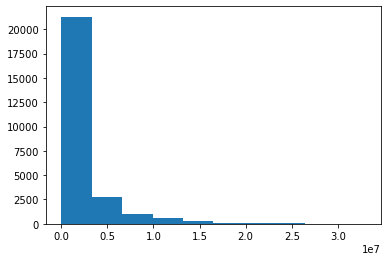

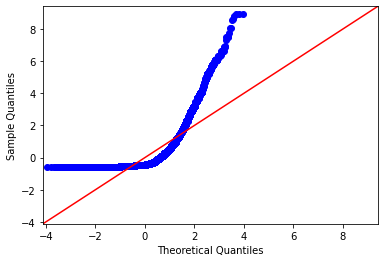

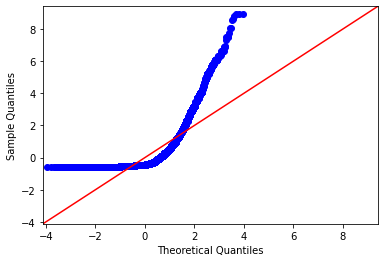

In [13]:
print('skew:{:.3f},kurt:{:.3f},{}'.format(stats.skew(m_s['salary']),stats.kurtosis(m_s['salary']),stats.jarque_bera(m_s[['salary']])))
plt.hist((target['salary']))
plt.show()
sm.qqplot((target['salary']), dist="norm", fit=True, line='45')

skew:0.368,kurt:-0.738,Jarque_beraResult(statistic=1191.3828439014783, pvalue=0.0)


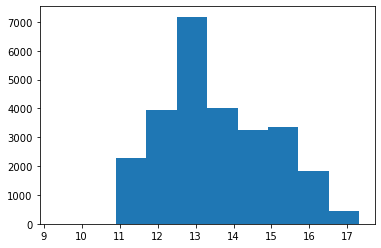

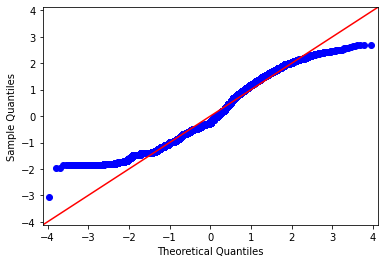

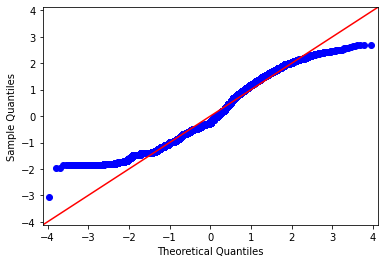

In [14]:
print('skew:{:.3f},kurt:{:.3f},{}'.format(stats.skew(np.log(m_s['salary'])),stats.kurtosis(np.log(m_s['salary'])),stats.jarque_bera(np.log(m_s['salary']))))
plt.hist(target['salary_adjust'])
plt.show()
sm.qqplot(target['salary_adjust'], dist="norm", fit=True, line='45')

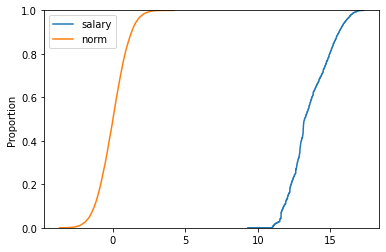

In [15]:
df = pd.DataFrame({"salary": target['salary_adjust'],#/.5e7
                 "norm" : norm.rvs(size=26321)})

p = sns.ecdfplot(data = df)

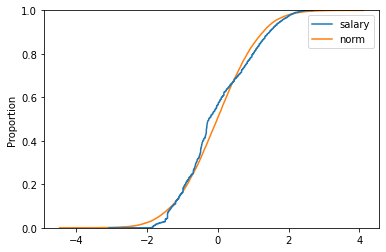

In [16]:
df = pd.DataFrame({"salary": StandardScaler().fit_transform(target[['salary_adjust']]).reshape(1,-1)[0],#/.5e7
                 "norm" : norm.rvs(size=26321)})

p = sns.ecdfplot(data = df)

## 觀察薪資結構是否為gamma、chi2分佈
Kolmogorov-Smirnov test是一種基於累計分布函數的非母數檢定，用以檢定兩個經驗分布是否不同或一個經驗分布與另一個理想分布是否不同。

C:\Users\ASUS\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


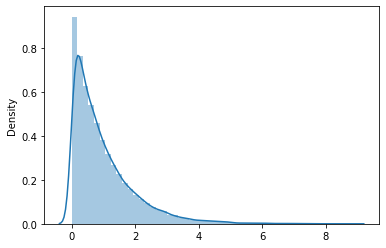

C:\Users\ASUS\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

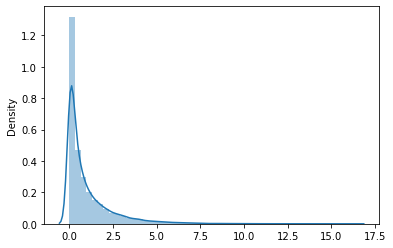

In [17]:
r = gamma.rvs(1, size=26321)
c = chi2.rvs(1,size=26321)
sns.distplot(r)
plt.show()
sns.distplot(c)

In [18]:
# 以一組具有gamma分佈的變數為例，確認該組變數是否為gamma分佈。
# 如果 p_value>=0.05，則'接受'該組變數具有gamma分佈的假設。
# 反之 p_value<0.05，則'拒絕'該組變數具有gamma分佈的假設。

stats.kstest(r,(gamma.rvs(1,size=100000)))

KstestResult(statistic=0.006038987500474935, pvalue=0.4312406929407999)

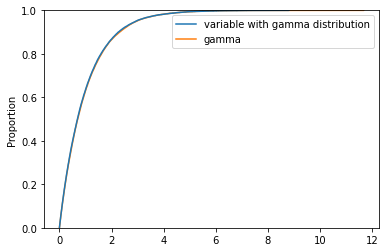

In [19]:
df = pd.DataFrame({"variable with gamma distribution": r,
                 "gamma" : gamma.rvs(1,size=26321)})

p = sns.ecdfplot(data = df)

##### 觀察薪資結構

In [20]:
# 觀察薪資結構，確認該組變數是否為gamma分佈。
# 如果 p_value>=0.05，則'接受'該組變數具有gamma分佈的假設。
# 反之 p_value<0.05，則'拒絕'該組變數具有gamma分佈的假設。

stats.kstest(target['salary'],r)

KstestResult(statistic=1.0, pvalue=0.0)

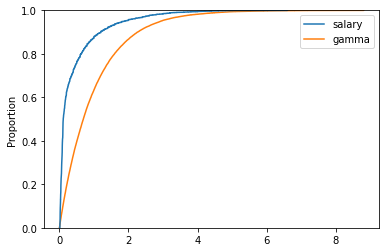

In [21]:
df = pd.DataFrame({"salary": target['salary']/.5e7,
                 "gamma" : r})

p = sns.ecdfplot(data = df)

In [22]:
# 觀察薪資結構，確認該組變數是否為chi2分佈。
# 如果 p_value>=0.05，則'接受'該組變數具有chi2分佈的假設。
# 反之 p_value<0.05，則'拒絕'該組變數具有chi2分佈的假設。

stats.kstest(target['salary'],c)

KstestResult(statistic=1.0, pvalue=0.0)

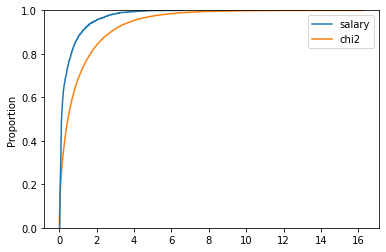

In [23]:
df = pd.DataFrame({"salary": target['salary']/.5e7,
                 "chi2" : c})

p = sns.ecdfplot(data = df)

##### 觀察 ln(薪資) 結構

In [24]:
# 觀察薪資結構，確認該組變數是否為gamma分佈。
# 如果 p_value>=0.05，則'接受'該組變數具有gamma分佈的假設。
# 反之 p_value<0.05，則'拒絕'該組變數具有gamma分佈的假設。

stats.kstest(target['salary_adjust'],gamma.rvs(1,size=100000))

KstestResult(statistic=0.9999420075225105, pvalue=0.0)

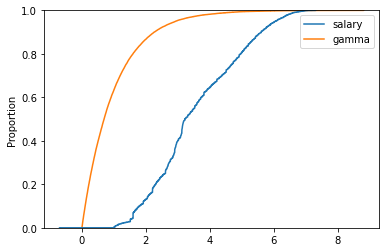

In [25]:
df = pd.DataFrame({"salary": target['salary_adjust']-10,
                 "gamma" : r})

p = sns.ecdfplot(data = df)

In [26]:
# 觀察薪資結構，確認該組變數是否為chi2分佈。
# 如果 p_value>=0.05，則'接受'該組變數具有chi2分佈的假設。
# 反之 p_value<0.05，則'拒絕'該組變數具有chi2分佈的假設。

stats.kstest(target['salary_adjust'],chi2.rvs(1,size=100000))

KstestResult(statistic=0.9989560225675317, pvalue=0.0)

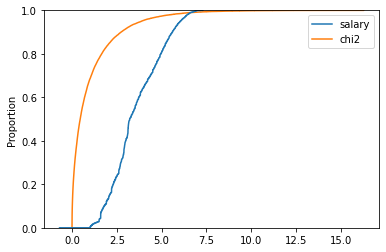

In [27]:
df = pd.DataFrame({"salary": target['salary_adjust']-10,
                 "chi2" : c})

p = sns.ecdfplot(data = df)

## 結論1 : 本研究的訓練目標(薪資)結構不屬於高斯分佈，更偏向 gamma、chi2分佈
## 結論2 : 本研究的ln(薪資)結構偏向高斯分佈，不屬於 gamma、chi2分佈

### output csv